# Duffing Oscillator Visualization

This notebook visualizes trajectories of the undriven Duffing oscillator defined in `data.duffing_spec`.

- System: dot(x) = v, dot(v) = x - x^3
- Parameters: undamped and undriven (conservative)
- Integrator: RK4 (from `data.rk4_step`)


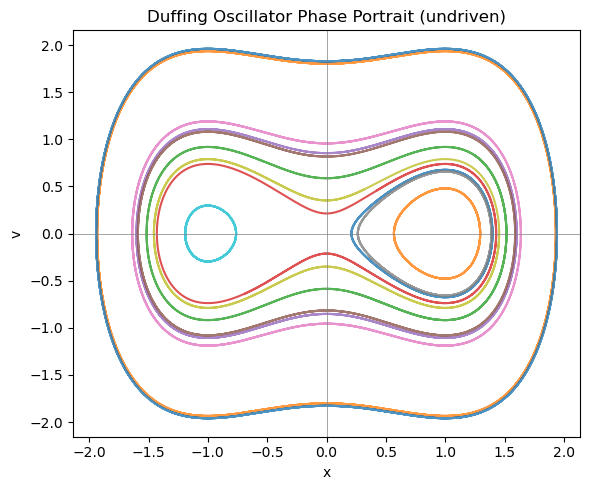

In [ ]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from data import duffing_spec, rk4_step

spec = duffing_spec()

# Simulation settings
rng = np.random.default_rng(0)
num_trajs = 12
steps = 4000
dt = 0.005

# Sample initial conditions
inits = [spec.init_sampler(rng).astype(np.float32) for _ in range(num_trajs)]

# Simulate
trajectories = []
for idx in range(num_trajs):
    x = inits[idx].copy()
    traj = np.zeros((steps, 2), dtype=np.float32)
    for k in range(steps):
        traj[k] = x
        x = rk4_step(spec.dynamics, k * dt, x, dt)
    trajectories.append(traj)

# Plot trajectories in phase space (x vs v)
plt.figure(figsize=(6, 5))
for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.8)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Duffing Oscillator Phase Portrait (undriven)")
plt.tight_layout()
plt.show()


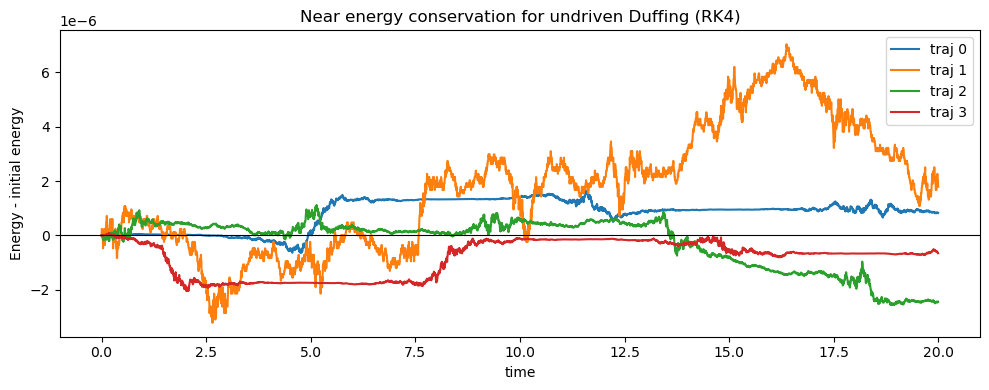

In [2]:
def potential(x):
    return -0.5 * x**2 + 0.25 * x**4

plt.figure(figsize=(10, 4))

# Choose a couple of trajectories to show energy fluctuate slightly (numerical)
for j, idx in enumerate([0, 1, 2, 3]):
    traj = trajectories[idx]
    t = np.arange(steps) * dt
    E = 0.5 * traj[:, 1]**2 + potential(traj[:, 0])
    plt.plot(t, E - E[0], label=f"traj {idx}")

plt.axhline(0, color='k', lw=0.8)
plt.xlabel("time")
plt.ylabel("Energy - initial energy")
plt.title("Near energy conservation for undriven Duffing (RK4)")
plt.legend()
plt.tight_layout()
plt.show()
